In [48]:
from langchain_core.tools import tool
from langchain_ollama import ChatOllama
from langchain_community.tools import DuckDuckGoSearchResults
from langgraph.prebuilt import ToolNode
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from pydantic import BaseModel, Field
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage,BaseMessage
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START,END
from typing import TypedDict,Annotated,Sequence,Union


In [49]:
class structure(BaseModel):
    title: str = Field(..., title="Title of the experiment copy exactly as  it appears in the original text")
    objective: str = Field(..., title="Objective of the experiment")
    materials: Union[list,str,dict] = Field(..., title="Materials used for the experiment")
    procedure: Union[list,str,dict] = Field(..., title="Procedure of the experiment")

class AgentState(TypedDict):
    """The state of the agent."""

    # add_messages is a reducer
    # See https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers
    messages: Annotated[Sequence[BaseMessage], add_messages]
    struct: structure

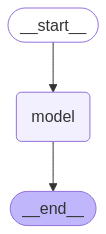

In [50]:
model = ChatOllama(model = "jacob-ebey/phi4-tools:latest")
strucutredOutput = model.with_structured_output(structure,method="json_mode")

def invoke_strucutred(state):
    exp = state["messages"][-1].content
    # print(exp)
    resp = strucutredOutput.invoke(f"you are given the following experiment in convert it into a json format of the following structure having title objective materials and procedure as keys, keep the content of each key same as the original text just format it to be json compliant, the original experiment is {exp}")
    print(resp)
    return {"struct":resp}

build = StateGraph(AgentState)
build.add_node("model",invoke_strucutred)

build.add_edge(START,"model")
build.add_edge("model",END)
graph = build.compile()
graph

In [51]:
import json
import os
def list_files_in_directory(directory):
    try:
        files = os.listdir(directory)
        return files
    except FileNotFoundError:
        print(f"The directory {directory} does not exist.")
    except PermissionError:
        print(f"Permission denied to access the directory {directory}.")

dirname = "ReActPhi4"
# files = list_files_in_directory(dirname)
# with open(f"{dirname}/{files[0]}") as f:
#     content = json.load(f)
# content['experiments']

In [55]:
ignore_files = ["phiReAct_Final_0.json","phiReAct_Final_1.json","phiReAct_Final_2.json","phiReAct_Final_3.json","phiReAct_Final_4.json","phiReAct_Final_5.json","phiReAct_Final_6.json","phiReAct_Final_7.json"]
for files in list_files_in_directory(dirname):
    if files in ignore_files:
        continue
    complete_exps = []
    with open(f"{dirname}/{files}") as f:
        content = json.load(f)['experiments']
        for exps in content:
            mess = [HumanMessage(str(exps))]
            final = graph.invoke({"messages":mess}) 
            complete_exps.append(dict(final['struct']))
    with open(f"formatted_exps_phi4/{files}","w") as f:
        findump = {"experiments":complete_exps}
        json.dump(findump,f,indent=4)
    

title="To verify the relationship between voltage (V), current (I), and resistance (R) in an electrical circuit, as expressed by Ohm's Law: V=IR" objective="To verify the relationship between voltage (V), current (I), and resistance (R) as expressed by Ohm's Law (\\( V = IR \\)), you can conduct a straightforward experiment. Below are the materials required, detailed steps for conducting the experiment, and essential safety procedures." materials=['Resistor: A known fixed resistor.', 'Variable Power Supply: To provide different voltage levels.', 'Voltmeter: For measuring the potential difference across the resistor.', 'Ammeter: For measuring the current flowing through the circuit.', 'Connecting Wires: To connect components in the circuit.', 'Breadboard or Circuit Board: Optional, for easier connection of components.', 'Switch: To control the flow of electricity in the circuit.'] procedure=[{'step': 'Circuit Setup', 'details': '- Connect the resistor in series with the ammeter and vari

OutputParserException: Failed to parse structure from completion {"title": "To generate and analyze Lissajous figures using an oscilloscope by applying two sinusoidal signals with different frequencies.", "objective": "", "materials": {"### Experiment Materials\n\n1. **Oscilloscope**: To display the Lissajous figures.\n2. **Function Generator**: To produce sinusoidal signals with different frequencies.\n3. **Connecting Cables**: BNC cables to connect the function generator and oscilloscope.\n4. **Power Supply**: For powering the equipment if necessary.": "procedure", "### Experiment Steps\n\n1. **Setup**:\n   - Connect the output of the function generator to Channel 1 (X-axis) on the oscilloscope using a BNC cable.\n   - Connect another output from the function generator to Channel 2 (Y-axis) on the oscilloscope using another BNC cable.\n\n2. **Configure Oscilloscope**:\n   - Turn on the oscilloscope and set it to display both channels simultaneously.\n   - Adjust the time base and voltage scales so that the waveform fits well within the screen.\n\n3. **Generate Signals**:\n   - Set the function generator to produce a sinusoidal signal at a specific frequency for Channel 1.\n   - Set another sinusoidal signal with a different frequency for Channel 2.\n\n4. **Observe Lissajous Figures**:\n   - Adjust the frequencies of both signals until you observe distinct Lissajous figures on the oscilloscope screen.\n   - Common ratios to start with include 1:1, 3:2, and 5:4.\n\n5. **Analyze Patterns**:\n   - Note the shape of the Lissajous figure for different frequency ratios.\n   - Use these shapes to determine the ratio of frequencies (e.g., a circle indicates equal frequencies).\n\n6. **Record Data**:\n   - Document the observed figures and corresponding frequency settings.\n   - Optionally, use software tools to capture and analyze the oscilloscope display.\n\n### Safety Procedures\n\n1. **Electrical Safety**:\n   - Ensure all equipment is properly grounded.\n   - Avoid touching any exposed wires or connectors while the equipment is powered on.\n\n2. **Equipment Handling**:\n   - Handle cables and connectors gently to avoid damage.\n   - Do not exceed the voltage ratings of the oscilloscope channels.\n\n3. **General Precautions**:\n   - Keep the workspace organized to prevent tripping hazards.\n   - Follow any specific safety guidelines provided by your institution or equipment manufacturer.\n\nBy following these steps, you can successfully generate and analyze Lissajous figures using an oscilloscope and a function generator.": "safety_procedures", "### Safety Procedures\n\n1. **Electrical Safety**:\n   - Ensure all equipment is properly grounded.\n   - Avoid touching any exposed wires or connectors while the equipment is powered on.\n\n2. **Equipment Handling**:\n   - Handle cables and connectors gently to avoid damage.\n   - Do not exceed the voltage ratings of the oscilloscope channels.\n\n3. **General Precautions**:\n   - Keep the workspace organized to prevent tripping hazards.\n   - Follow any specific safety guidelines provided by your institution or equipment manufacturer.": "conclusion", "By following these steps, you can successfully generate and analyze Lissajous figures using an oscilloscope and a function generator.": ""}, "  ,  ": 1.0}. Got: 1 validation error for structure
procedure
  Field required [type=missing, input_value={'title': 'To generate an...or.': ''}, '  ,  ': 1.0}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/missing
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 

In [38]:
cont = '''{
            "To verify the relationship between voltage (V), current (I), and resistance (R) in an electrical circuit, as expressed by Ohm's Law: V=IRV = IRV=IR": "To verify the relationship between voltage (V), current (I), and resistance (R) in an electrical circuit as expressed by Ohm's Law (\\( V = IR \\)), you can conduct a straightforward experiment. Below are the required materials, detailed steps for conducting the experiment, and essential safety procedures.\n\n### Experiment Materials\n\n1. **Power Supply**: A variable DC power supply to adjust voltage.\n2. **Resistor(s)**: Known resistance values (e.g., 100\u03a9, 220\u03a9).\n3. **Ammeter**: To measure current flowing through the circuit.\n4. **Voltmeter**: To measure the potential difference across the resistor.\n5. **Connecting Wires**: For making connections in the circuit.\n6. **Breadboard or Circuit Board**: Optional, for organizing components.\n7. **Switch**: To easily open and close the circuit.\n\n### Experiment Steps\n\n1. **Setup the Circuit**:\n   - Connect the power supply, ammeter, resistor, and voltmeter in series to form a complete circuit.\n   - Ensure that the positive terminal of the power supply is connected to one end of the resistor, the other end of the resistor connects back to the negative terminal through the ammeter. The voltmeter should be connected parallel to the resistor.\n\n2. **Initial Checks**:\n   - Verify all connections are secure and correct.\n   - Ensure that the switch is open before turning on the power supply.\n\n3. **Conduct Measurements**:\n   - Close the circuit using the switch.\n   - Gradually increase the voltage from the power supply in small increments (e.g., 1V steps).\n   - For each voltage setting, record the current reading from the ammeter and the corresponding voltage reading from the voltmeter.\n\n4. **Data Collection**:\n   - Repeat the measurements for several different voltages.\n   - Record at least three readings for each voltage to ensure accuracy and calculate an average if necessary.\n\n5. **Graphing**:\n   - Plot a graph of Voltage (V) on the y-axis against Current (I) on the x-axis.\n   - The resulting graph should be a straight line through the origin if Ohm's Law is verified, indicating that \\( V \\propto I \\).\n\n6. **Calculate Resistance**:\n   - From the slope of the V-I graph, calculate the resistance using \\( R = \\frac{V}{I} \\).\n   - Compare this calculated value with the known resistance to verify consistency.\n\n### Safety Procedures\n\n- **Power Off First**: Always turn off and disconnect the power supply before making or changing connections in the circuit.\n- **Use Proper Equipment**: Ensure that all measuring instruments are rated for the voltages and currents you will be using.\n- **Avoid Short Circuits**: Double-check connections to prevent short circuits, which can damage equipment or cause injury.\n- **Handle with Care**: Be cautious when handling electrical components to avoid electric shock or burns.\n\nBy following these steps and precautions, you should be able to successfully verify Ohm's Law in a controlled laboratory setting."
        }'''
mess = [HumanMessage(cont)]
final = graph.invoke({"messages":mess})

title="To verify the relationship between voltage (V), current (I), and resistance (R) in an electrical circuit as expressed by Ohm's Law (\xa0V = IR\xa0)" objective="To verify the relationship between voltage (V), current (I), and resistance (R) in an electrical circuit as expressed by Ohm's Law (\xa0V = IR\xa0), you can conduct a straightforward experiment. Below are the required materials, detailed steps for conducting the experiment, and essential safety procedures." materials=['Power Supply: A variable DC power supply to adjust voltage.', 'Resistor(s): Known resistance values (e.g., 100Ω, 220Ω).', 'Ammeter: To measure current flowing through the circuit.', 'Voltmeter: To measure the potential difference across the resistor.', 'Connecting Wires: For making connections in the circuit.', 'Breadboard or Circuit Board: Optional, for organizing components.', 'Switch: To easily open and close the circuit.'] procedure=[{'step': 'Setup the Circuit', 'details': '- Connect the power supply, 

In [43]:
dict(final["struct"])

{'title': "To verify the relationship between voltage (V), current (I), and resistance (R) in an electrical circuit as expressed by Ohm's Law (\xa0V = IR\xa0)",
 'objective': "To verify the relationship between voltage (V), current (I), and resistance (R) in an electrical circuit as expressed by Ohm's Law (\xa0V = IR\xa0), you can conduct a straightforward experiment. Below are the required materials, detailed steps for conducting the experiment, and essential safety procedures.",
 'materials': ['Power Supply: A variable DC power supply to adjust voltage.',
  'Resistor(s): Known resistance values (e.g., 100Ω, 220Ω).',
  'Ammeter: To measure current flowing through the circuit.',
  'Voltmeter: To measure the potential difference across the resistor.',
  'Connecting Wires: For making connections in the circuit.',
  'Breadboard or Circuit Board: Optional, for organizing components.',
  'Switch: To easily open and close the circuit.'],
 'procedure': [{'step': 'Setup the Circuit',
   'detai